# SKLearn介绍(SciKit-Learn)

#1 模块介绍

##1.1 监督学习
- neighbors:近邻算法
- svm：支持向量机
- kernal_ridge：核岭回归
- discriminant_analysis:判别分析
- linear_model:广义线性模型
- ensemble:集成方法，包括随机森林，bagging
- tree:决策树
- naive_bayes：朴素贝叶斯
- cross_decomposition：交叉分解
- gaussian_process：高斯过程
- neural_network：多层神经网络
- calibration:概率校准
- isotonic：保序回归
- feature_selection：监督特征选择
- multiclass：多类多标签算法

##1.2 无监督学习
- decomposition:矩阵因子分解
- cluster：聚类分析
- manifold：流形学习
- mixture:高斯混合模型
- neural_network:无监督神经网络
- density：密度估计
- covariance：协方差估计

##1.3 数据变换
- preprocessing：数据预处理。包括数据缺失值的处理，数据的规范化，数据的归一化等等。比如数据原来不是标准正太分布
- feature_extraction:特征抽取。只负责把特征提取出来
- feature_selection:特征选择。留下好的特征，丢掉不好的特征
- random_projection:随机投影。将特征进行空间变换,将特征映射到好处理的空间上去
- kernel_approximation：核逼近。将特征进行空间变换,将特征映射到好处理的空间上去
- pipeline:管道流。

#2 六大板块与统一调用API
分类、回归、聚类、维数约简、特征抽取选择、数据预处理
```Python
estimator.fit(x_train,[y_train])
```
- 对于Classification、Regression和Clustering,有predict函数
- 对于Preprocessing、Dimensionality Reduction、Feature Extraction和Feature selection，有transform函数

##2.1 predict相关例子

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
All: [ 33.33333333  33.33333333  33.33333333]
Training: [ 33.92857143  33.03571429  33.03571429]
Test: [ 31.57894737  34.21052632  34.21052632]
Fraction Correct [Accuracy]:
0.973684210526
Samples correctly classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 27 28 29 30 31 32 33 34 35 36 37]
Samples incorrectly classified:
[25]
[[ 7.7  3.   6.1  2.3]
 [ 4.9  3.1  1.5  0.1]
 [ 5.9  3.   4.2  1.5]
 [ 7.7  3.8  6.7  2.2]
 [ 4.4  3.2  1.3  0.2]
 [ 4.4  3.   1.3  0.2]
 [ 6.7  3.1  4.4  1.4]
 [ 7.2  3.2  6.   1.8]
 [ 5.5  2.4  3.8  1.1]
 [ 5.1  3.8  1.5  0.3]
 [ 5.6  2.9  3.6  1.3]
 [ 5.5  4.2  1.4  0.2]
 [ 6.4  3.2  5.3  2.3]
 [ 6.3  2.5  5.   1.9]
 [ 

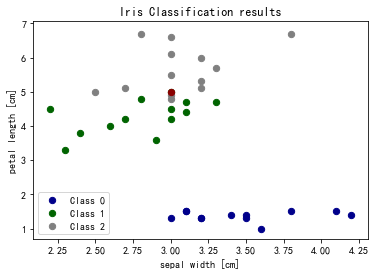

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target
print(y)
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, random_state=123,
                                                    stratify=y)
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

classifier = KNeighborsClassifier()
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("Fraction Correct [Accuracy]:")
accuracy = np.sum(pred_y == test_y) / float(len(test_y))
print(accuracy)

print("Samples correctly classified:")
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print("Samples incorrectly classified:")
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

colors = ["darkblue","darkgreen","gray"]
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1],test_X[idx, 2],c=color, s =40, label="Class %s" % n)
    
plt.scatter(test_X[incorrect_idx, 1],test_X[incorrect_idx,2],c='darkred', s =40)
plt.xlabel("sepal width [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="lower left")
plt.title("Iris Classification results")
plt.show()

before: (100,)
after: (100, 1)
Weight coefficients: [ 0.90211711]
y-axis intercept: 0.448409749883


Score: 0.799432140508


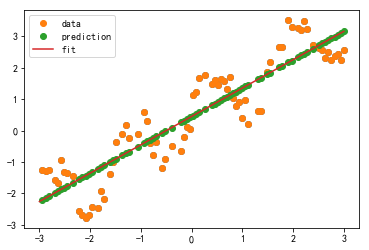

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

print('before:', x.shape)
X = x[:, np.newaxis]
print('after:', X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Weight coefficients:', regressor.coef_) # 最小二乘法的系数
print('y-axis intercept:', regressor.intercept_) # 最小二乘法的截距

min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_


plt.plot(X_train, y_train, 'o')

y_pred_train = regressor.predict(X_train)
print('Score:', regressor.score(X_test, y_test))
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')
plt.show()